In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
PATH = "3D-MR-MS_patient01-05/patient01"
os.listdir(PATH)

['patient01_brainmask.nii.gz',
 'patient01_consensus_gt.nii.gz',
 'patient01_FLAIR.nii.gz',
 'patient01_T1W.nii',
 'patient01_T1W.nii.gz',
 'patient01_T1WKS.nii.gz',
 'patient01_T1WKS_to_FLAIR.txt',
 'patient01_T1W_to_FLAIR.txt',
 'patient01_T2W.nii.gz',
 'patient01_T2W_to_FLAIR.txt',
 'raw']

In [6]:
img1 = nib.load(f"{PATH}/patient01_T1W.nii/patient01_T1W.nii")

In [15]:
img1_data = img1.get_fdata()
print(img1_data.shape)

(192, 512, 512)


In [12]:
# img1_data = img1_data.transpose(2, 1, 0)
# print(img1_data.shape)

(512, 512, 192)


In [28]:
def plot_slices(img_data, num_slices, increment):
    img_data = img_data.transpose(2, 1, 0)
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    for i in range(num_slices):
        slice_index = i * increment if i * increment < img_data.shape[2] else img_data.shape[2] - 1
        slice_data = img_data[:, :, slice_index]
        axes[i].imshow(slice_data.T)
        axes[i].set_title(f'Slice {slice_index}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

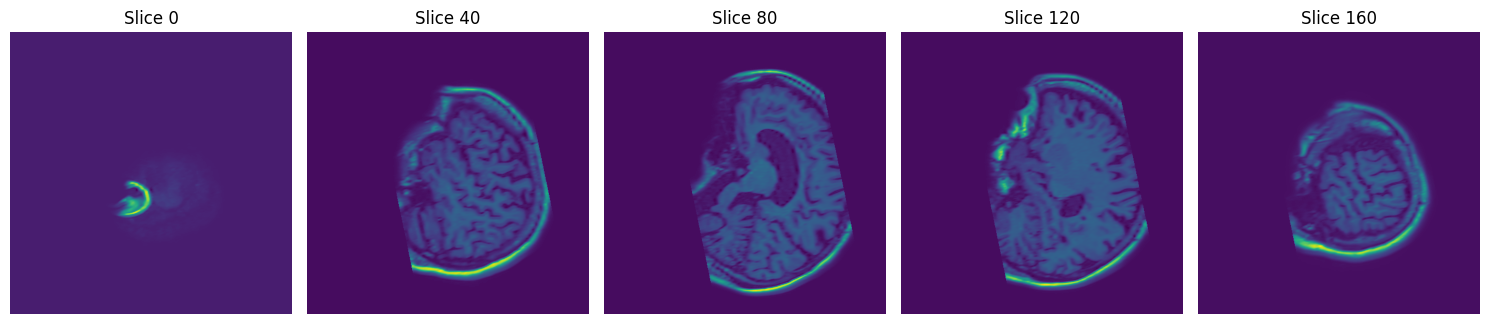

In [29]:
plot_slices(img1_data, 5, 40)

In [30]:
img2 = nib.load(f"{PATH}/patient01_T2W.nii/patient01_T2W.nii")
img2_data = img2.get_fdata()

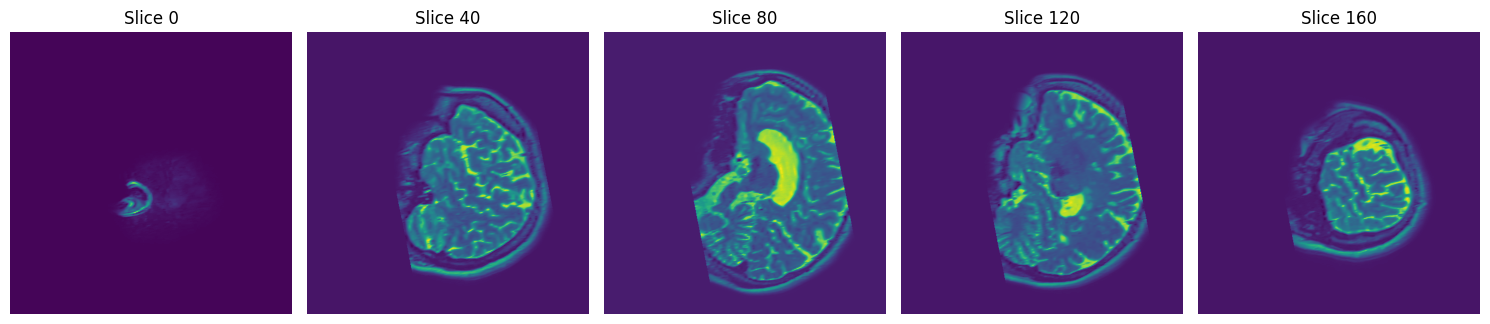

In [31]:
plot_slices(img2_data, 5, 40)

In [33]:
img3 = nib.load(f"{PATH}/patient01_consensus_gt.nii/patient01_consensus_gt.nii")
img3_data = img3.get_fdata()

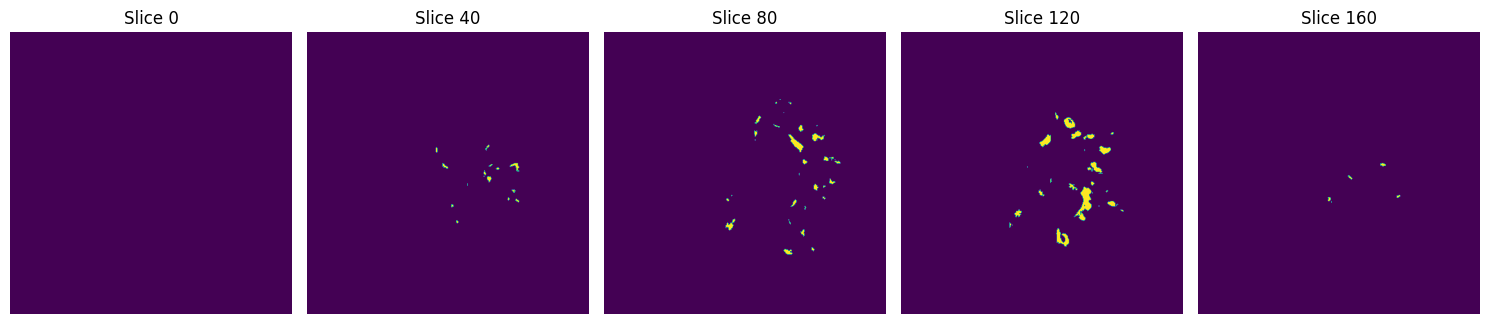

In [35]:
plot_slices(img3_data, 5, 40)

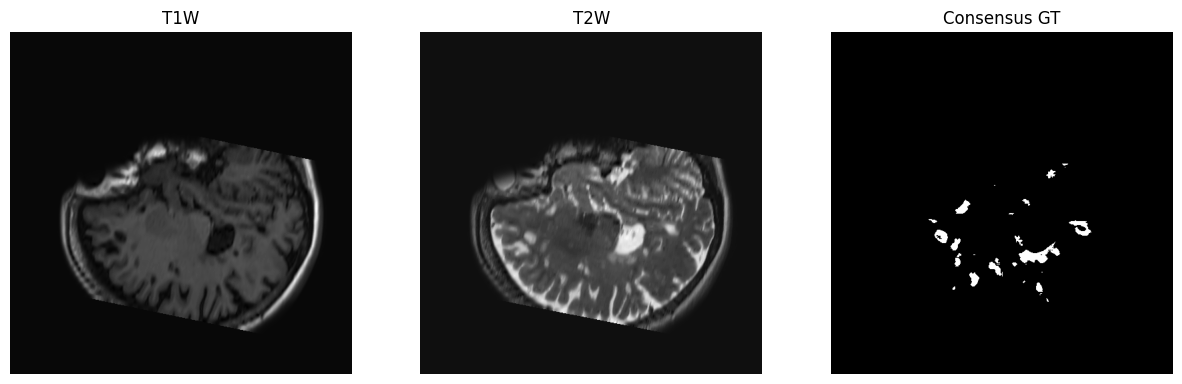

In [46]:
slice = 120
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img1_data[slice, :, :].T, cmap='gray')
plt.title('T1W')
plt.axis('off')
plt.subplot(132)
plt.imshow(img2_data[slice, :, :].T, cmap='gray')
plt.title('T2W')
plt.axis('off')
plt.subplot(133)
plt.imshow(img3_data[slice, :, :].T, cmap='gray')
plt.title('Consensus GT')
plt.axis('off')
plt.show()

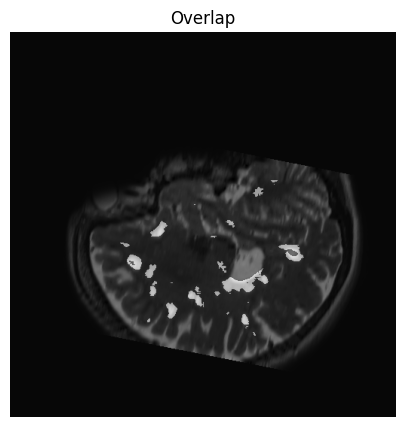

In [49]:
# show overlap 
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.title('Overlap')
plt.imshow(img2_data[slice, :, :].T, cmap='gray')
plt.imshow(img3_data[slice, :, :].T, alpha=0.5, cmap='gray')
plt.show()